In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.metrics import roc_auc_score

import json
import pickle
import random as python_random
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

IMG_SIZE_1 = 224
IMG_SIZE_2 = 299

In [ ]:
df = pd.read_csv('/content/drive/My Drive/neural_network/meta.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['gender'])
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=0, stratify=train_df['gender'])

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Plot all histories

# Nithya's Part Histories

In [ ]:
# Nithya's Part Folder
save_path = './drive/MyDrive/nn_project/nit_res'
hist_file = './drive/MyDrive/nn_project/histories/vgg16_histories'
base_model = 'vgg16'

# Load back history dictionary
vgg16_hist = pickle.load(open(hist_file, "rb"))

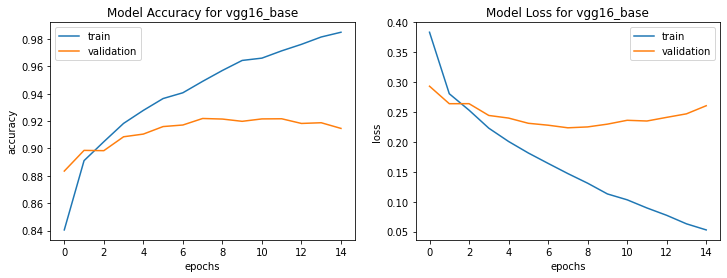

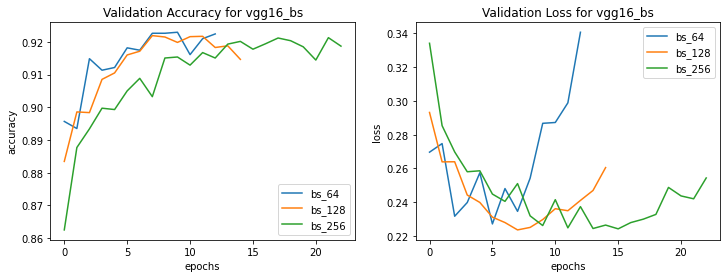

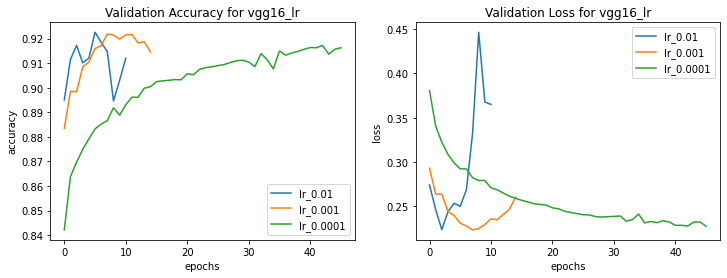

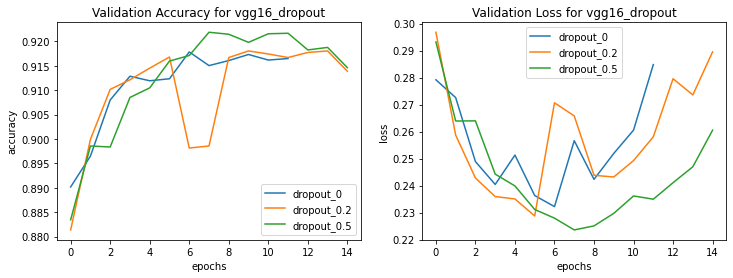

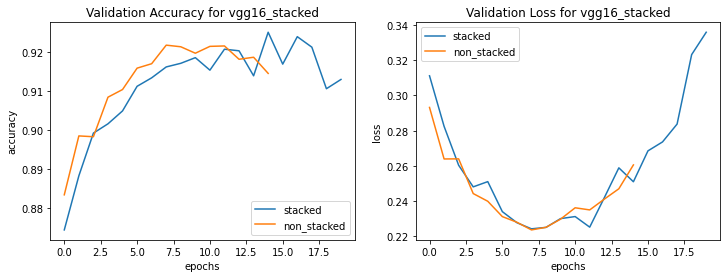

In [ ]:
# Plot Base Model
base_model_plot(vgg16_hist['vgg16_base'], 'vgg16_base', save_path)

# Plot hyperparameter opts graphs
param_opt_plot(vgg16_hist, base_model, save_path)

# Jiawei's Histories

In [ ]:
# JW's Part Folder
save_path = './drive/MyDrive/nn_project/jw_res'
hist_file = './drive/MyDrive/nn_project/histories/densenet_histories'
base_model = 'densenet'

# Load back history dictionary
densenet_hist = pickle.load(open(hist_file, "rb"))

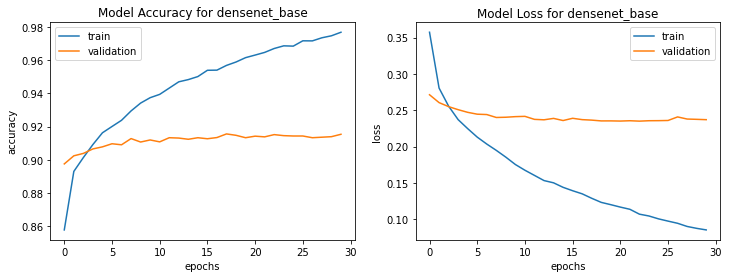

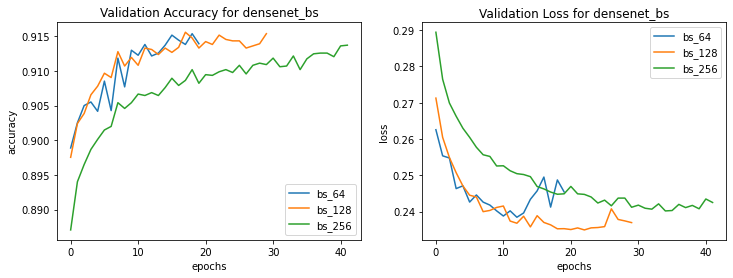

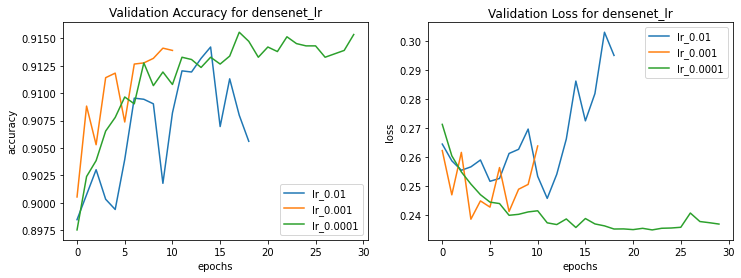

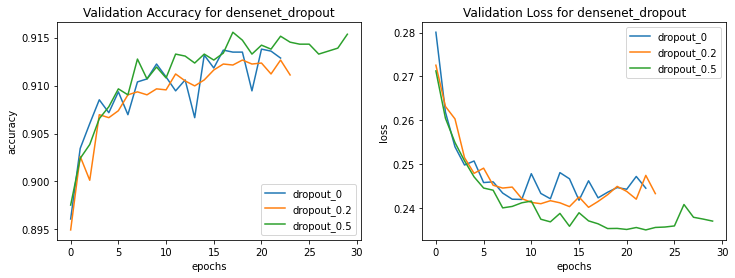

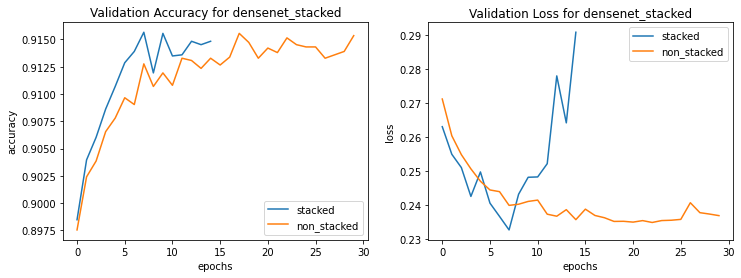

In [ ]:
# Plot Base Model
base_model_plot(densenet_hist['densenet_base'], 'densenet_base', save_path)

# Plot hyperparameter opts graphs
param_opt_plot(densenet_hist, base_model, save_path)

# WQ's Part Histories

In [6]:
# WQ's Part Folder
save_path = './drive/MyDrive/nn_project/wq_res'
hist_file = './drive/MyDrive/nn_project/histories/inc_res_histories'
base_model = 'inc_res'

# Load back history dictionary
inc_res_hist = pickle.load(open(hist_file, "rb"))

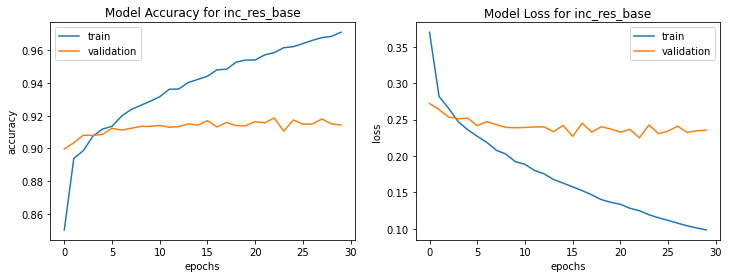

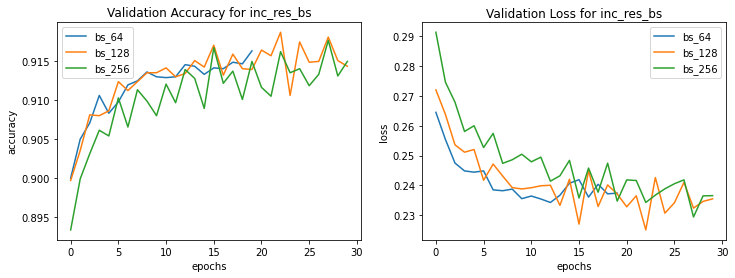

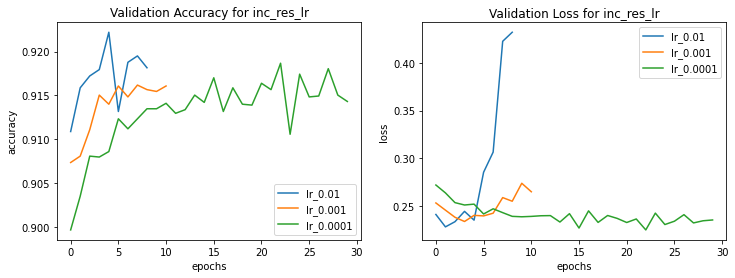

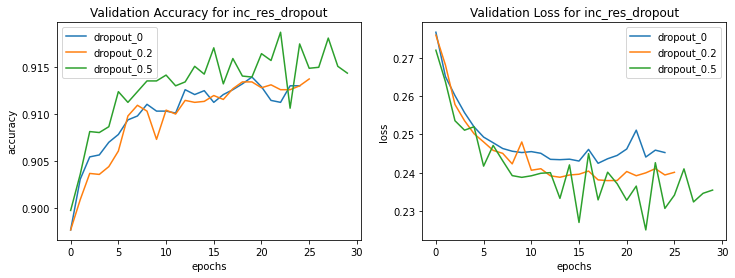

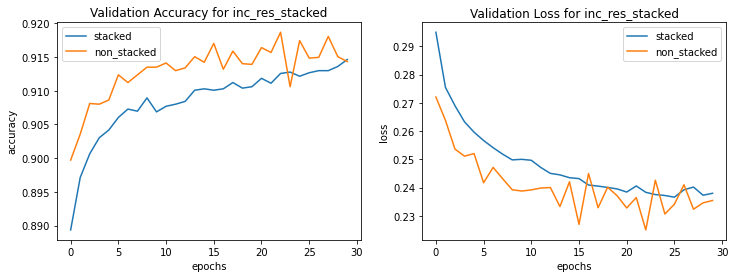

In [ ]:
# Plot Base Model
base_model_plot(inc_res_hist['inc_res_base'], 'inc_res_base', save_path)

# Plot hyperparameter opts graphs
param_opt_plot(inc_res_hist, base_model, save_path)

# Remaining 3 base models

In [7]:
# Other 3 base models Folder
save_path = './drive/MyDrive/nn_project'
hist_file = './drive/MyDrive/nn_project/histories/other3base_histories'

# Load back history dictionary
other3base_hist = pickle.load(open(hist_file, "rb"))

In [8]:
len(other3base_hist['resnet50_base']['val_acc'])

14

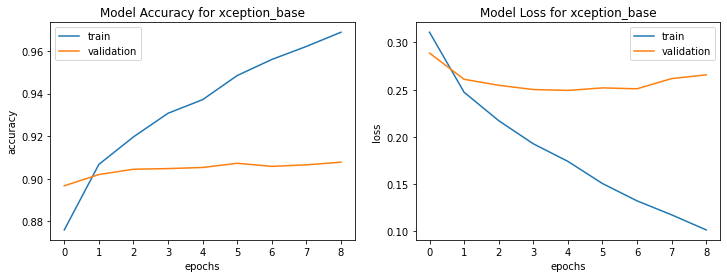

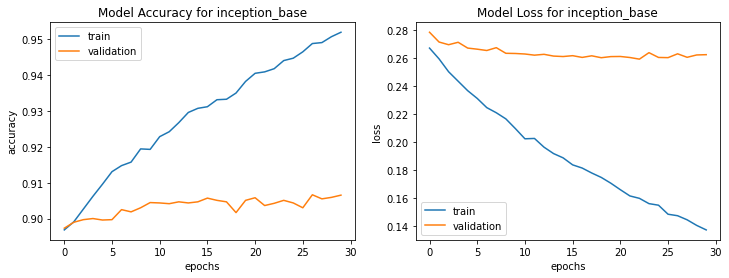

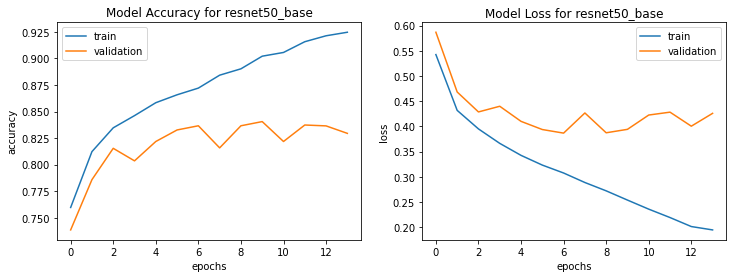

In [ ]:
# Plot Base Model
for key, value in other3base_hist.items():
  base_model_plot(value, key, save_path)

# Plot all 6 base models together

In [ ]:
# All 6 base models
save_path = './drive/MyDrive/nn_project'
hist_file = './drive/MyDrive/nn_project/histories/base_histories'

# Load back history dictionary
base_hist = pickle.load(open(hist_file, "rb"))

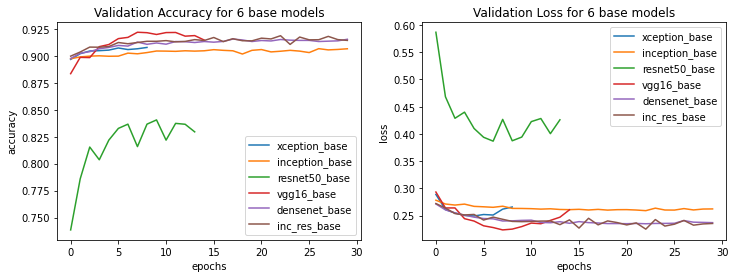

In [ ]:
# Plot hyperparameter opts graphs
plot_history_tgt(base_hist, '6 base models', None, save_path)

# Get 3 Optimal Models

In [ ]:
# Other 3 base models Folder
save_path = './drive/MyDrive/nn_project'
hist_file = './drive/MyDrive/nn_project/histories/optimal_histories'

# Load back history dictionary
optimal_hist = pickle.load(open(hist_file, "rb"))

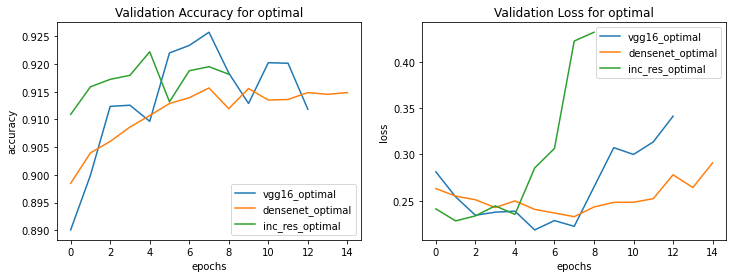

In [ ]:
# Plot hyperparameter opts graphs
plot_history_tgt(optimal_hist, 'optimal', None, save_path)

# Transfer Learning Fine-Tuning

In [ ]:
# Transfer Learning
save_path = './drive/MyDrive/nn_project'
hist_file = './drive/MyDrive/nn_project/histories/tl_histories'

# Load back history dictionary
tl_hist = pickle.load(open(hist_file, "rb"))

In [ ]:
tl_hist_no_optimal = tl_hist.copy()
del tl_hist_no_optimal['vgg16_optimal']

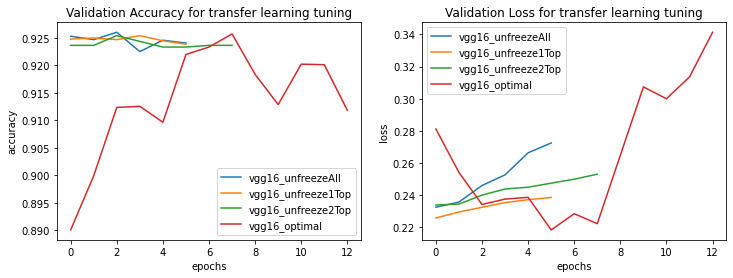

In [ ]:
# Plot hyperparameter opts graphs
plot_history_tgt(tl_hist, 'transfer learning tuning', None, save_path)

# Get Max Validation Accuracy for all models

In [ ]:
all_hist = [vgg16_hist, densenet_hist, inc_res_hist, other3base_hist, optimal_hist, tl_hist_no_optimal]
max_val_acc = {}
overall_max = 0
max_model = None
print('Max Validation Accuracy for each model')
for hist in all_hist:
  for model, history in hist.items():
    if 'acc' in history.keys():
      max_val_acc[model] = np.max(history['val_acc'])
      epoch = np.argmax(history['val_acc']) + 1
    else:
      max_val_acc[model] = np.max(history['val_accuracy'])
      epoch = np.argmax(history['val_accuracy']) + 1
    print('{:<25}: {:.4f}'.format(model, max_val_acc[model]))
    if max_val_acc[model] > overall_max:
      overall_max = max_val_acc[model]
      max_model = model
print()
print('The best model is {} with {:.4f}'.format(max_model, overall_max))

Max Validation Accuracy for each model
vgg16_base               : 0.9219
vgg16_stacked            : 0.9252
vgg16_dropout_0          : 0.9178
vgg16_dropout_0.2        : 0.9180
vgg16_lr_0.01            : 0.9226
vgg16_lr_0.0001          : 0.9172
vgg16_bs_64              : 0.9229
vgg16_bs_256             : 0.9213
densenet_base            : 0.9156
densenet_lr_0.001        : 0.9141
densenet_stacked         : 0.9157
densenet_lr_0.01         : 0.9142
densenet_bs_64           : 0.9154
densenet_dropout_0.2     : 0.9127
densenet_bs_256          : 0.9137
densenet_dropout_0       : 0.9138
inc_res_bs_64            : 0.9163
inc_res_base             : 0.9187
inc_res_bs_256           : 0.9176
inc_res_lr_0.01          : 0.9222
inc_res_lr_0.001         : 0.9162
inc_res_dropout_0        : 0.9139
inc_res_dropout_0.2      : 0.9137
inc_res_stacked          : 0.9146
xception_base            : 0.9078
inception_base           : 0.9067
resnet50_base            : 0.8406
vgg16_optimal            : 0.9257
densenet_

In [ ]:
df = pd.DataFrame(list(max_val_acc.items()),columns = ['model', 'max_val_acc']) 
df_sorted = df.sort_values(by=['max_val_acc'])
df_sorted.to_csv('./drive/MyDrive/nn_project/max_val_acc_res')

In [ ]:
df_sorted

,model,max_val_acc
26,resnet50_base,0.840551
25,inception_base,0.906651
24,xception_base,0.907791
13,densenet_dropout_0.2,0.912661
22,inc_res_dropout_0.2,0.913697
14,densenet_bs_256,0.913697
15,densenet_dropout_0,0.913800
21,inc_res_dropout_0,0.913904
9,densenet_lr_0.001,0.914111
11,densenet_lr_0.01,0.914215


# Reorganising the histories pickles

In [ ]:
# Nithya's Part Folder
hist_file = './drive/MyDrive/nn_project/histories/histories_nithya.pickle'

# Load back history dictionary
nits_hist = pickle.load(open(hist_file, "rb"))
nits_hist.keys()

dict_keys(['EfficientNetB0', 'xception', 'vgg16', 'vgg19', 'vgg16_stacked', 'vgg16_drop-rate:0', 'vgg16_drop-rate:0.2', 'vgg16_lr:0.01', 'vgg16_lr:0.0001', 'vgg16_batch-size:64', 'vgg16_batch-size:256', 'non_transferLearning_model', 'vgg16_optimal', 'vgg16_unfreezeAll', 'vgg16_unfreeze1Top', 'vgg16_unfreeze2Top'])

In [ ]:
# Get all Transfer Learning Tuning Models
base_hist = other3base_hist.copy()
base_hist['vgg16_base'] = nits_hist['vgg16']
base_hist['densenet_base'] = densenet_hist['densenet_base']
base_hist['inc_res_base'] = inc_res_hist['inc_res_base']
base_hist.keys()

dict_keys(['xception_base', 'inception_base', 'resnet50_base', 'vgg16_base', 'densenet_base', 'inc_res_base'])

In [ ]:
# Nithya's Part Folder
save_path = './drive/MyDrive/nn_project/histories/base_histories'

with open(save_path, 'wb') as file_pi:
      pickle.dump(base_hist, file_pi)

test = pickle.load(open(save_path, "rb"))
test.keys()

dict_keys(['xception_base', 'inception_base', 'resnet50_base', 'vgg16_base', 'densenet_base', 'inc_res_base'])

# Get my CM and all other scores

In [ ]:
def generate_data(train_df, val_df, test_df, img_size, batch_size):
  # data generator for training data
  train_generator = train_datagen.flow_from_dataframe(train_df, x_col="path", 
                                                      y_col="gender", 
                                                      target_size=(img_size,img_size), 
                                                      batch_size=batch_size, 
                                                      class_mode='binary')

  # data generator for validation data
  validation_generator = validation_datagen.flow_from_dataframe(val_df, x_col="path", 
                                                                y_col="gender", 
                                                                target_size=(img_size,img_size),
                                                                batch_size=batch_size, 
                                                                class_mode='binary')
  
  # data generator for validation data for prediction
  predict_generator = validation_datagen.flow_from_dataframe(val_df, x_col="path", 
                                                                y_col="gender", 
                                                                target_size=(img_size,img_size),
                                                                batch_size=batch_size, 
                                                                class_mode='binary',
                                                                shuffle = False)
  # data generator for testing data
  test_generator = test_datagen.flow_from_dataframe(test_df, x_col="path", 
                                                    y_col="gender", 
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size, 
                                                    class_mode='binary',
                                                    shuffle = False)
  
  generators = {'train_gen': train_generator,
                'validation_gen': validation_generator,
                'test_gen': test_generator,
                'predict_gen': predict_generator}
  
  return generators

In [ ]:
"""
model: your trained model
val_gen: validation generator
base_model: Name of base model -> e.g. DenseNet, VGG16
param_opt: parameter optimised --> <parameter optimised>_<value>, value is optional
E.g. base, dropout_0.5, stacked, bs_64, lr_0.01
save_path: path where you want to save all outputs e.g. './results'
"""

def model_analysis(model, val_gen, base_model, param_opt, save_path):
  title = '{}_{}'.format(base_model, param_opt)
  print('Results for {}'.format(title))
  prediction = model.predict(val_gen,
                             steps=val_gen.samples/val_gen.batch_size,
                             verbose=1)
  predicted_classes = prediction.flatten()
  predicted_classes[predicted_classes>=0.5] = 1
  predicted_classes[predicted_classes<0.5] = 0
  
  actual = val_gen.classes
  errors = np.where(predicted_classes != actual)[0]
  print("Error rate {}".format(len(errors)/val_gen.samples))
  
  genders = ['Female', 'Male']
  cm = confusion_matrix(actual, predicted_classes)
  sns.heatmap(cm, annot=True, cmap='Blues', fmt="d",
              xticklabels=genders, yticklabels=genders)
  
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title(title)
  plt.savefig('{}/{}_cm.pdf'.format(save_path, title))
  plt.close()
  
  print(classification_report(actual, predicted_classes, target_names=genders))
  clsf_report = pd.DataFrame(classification_report(actual, predicted_classes, target_names=genders, output_dict=True)).transpose()
  clsf_report.to_csv('{}/{}_cr.csv'.format(save_path, title), index= True)

  # Get AUC ROC Score and save as a file
  roc_auc = roc_auc_score(actual, predicted_classes)
  roc_auc_file = '{}/{}_roc_auc'.format(save_path, title)
  params = {'title': title,
            'roc_auc': roc_auc}
  with open(roc_auc_file, 'w') as fp:
    json.dump(params, fp)
  print("Successfully saved auc_roc file at {}".format(roc_auc_file))

In [ ]:
title = 'bs_inc_res_128'
filename = './drive/MyDrive/nn_project/inception_resnet/bs_inc_res/bs_128/{}_mc.h5'.format(title)
title = 'base'
model = load_model(filename)

In [ ]:
generators = generate_data(train_df, val_df, test_df, IMG_SIZE_2, 128)

Found 22520 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 8044 validated image filenames belonging to 2 classes.


In [ ]:
model_analysis(model, generators['predict_gen'], 'InceptionResnetV2', title, '.')

Results for InceptionResnetV2_base
76/75 [==============================] - 88s 1s/step
Error rate 0.08454206382096975
              precision    recall  f1-score   support

      Female       0.89      0.77      0.83      2517
        Male       0.92      0.97      0.94      7135

    accuracy                           0.92      9652
   macro avg       0.91      0.87      0.88      9652
weighted avg       0.91      0.92      0.91      9652

Successfully saved auc_roc file at ./InceptionResnetV2_base_roc_auc


In [ ]:
# Load back models for batch_size
BATCH_SIZES = [64,128,256]
for bs in BATCH_SIZES:
  title = 'bs_inc_res_{}'.format(bs)
  filename = './drive/MyDrive/nn_project/inception_resnet/bs_inc_res/bs_{}/{}_mc.h5'.format(bs, title)
  if bs == 128:
    title = 'base'
  else:
    title = 'bs_{}'.format(bs)
  model = load_model(filename)

  # Prepare data for base model
  generators = generate_data(train_df, val_df, test_df, IMG_SIZE_2, bs)

  model_analysis(model, generators['predict_gen'], 'InceptionResnetV2', title, './drive/MyDrive/nn_project/inception_resnet/imgs')

Found 22520 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 8044 validated image filenames belonging to 2 classes.
Results for InceptionResnetV2_bs_64
151/150 [==============================] - 88s 584ms/step
Error rate 0.08547451305428927
              precision    recall  f1-score   support

      Female       0.89      0.77      0.82      2517
        Male       0.92      0.97      0.94      7135

    accuracy                           0.91      9652
   macro avg       0.91      0.87      0.88      9652
weighted avg       0.91      0.91      0.91      9652

Successfully saved auc_roc file at ./drive/MyDrive/nn_project/inception_resnet/imgs/InceptionResnetV2_bs_64_roc_auc
Found 22520 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Fou

In [ ]:
generators = generate_data(train_df, val_df, test_df, 299, 128)
LEARNING_RATES = [1e-2, 1e-3]
for lr in LEARNING_RATES:
  title = 'lr_inc_res_{}'.format(lr)
  filename = './drive/MyDrive/nn_project/inception_resnet/lr_inc_res/lr_{}/{}_mc.h5'.format(lr, title)
  title = 'lr_{}'.format(lr) 
  model = load_model(filename)
  
  model_analysis(model, generators['predict_gen'], 'InceptionResnetV2', title, './drive/MyDrive/nn_project/inception_resnet/imgs')

Found 22520 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 8044 validated image filenames belonging to 2 classes.
Results for InceptionResnetV2_lr_0.01
76/75 [==============================] - 87s 1s/step
Error rate 0.07687525901367592
              precision    recall  f1-score   support

      Female       0.90      0.79      0.84      2517
        Male       0.93      0.97      0.95      7135

    accuracy                           0.92      9652
   macro avg       0.92      0.88      0.90      9652
weighted avg       0.92      0.92      0.92      9652

Successfully saved auc_roc file at ./drive/MyDrive/nn_project/inception_resnet/imgs/InceptionResnetV2_lr_0.01_roc_auc
Results for InceptionResnetV2_lr_0.001
76/75 [==============================] - 87s 1s/step
Error rate 0.08547451305428927
              precision    recall  f1-score   support

      Fema

In [ ]:
generators = generate_data(train_df, val_df, test_df, 299, 128)
DROPOUT_RATES = [0, 0.2]
for dr in DROPOUT_RATES:
  title = 'dropout_inc_res_{}'.format(dr)
  filename = './drive/MyDrive/nn_project/inception_resnet/dropout_inc_res/dropout_{}/{}_mc.h5'.format(dr, title)
  title = 'dropout_{}'.format(dr) 
  model = load_model(filename)

  model_analysis(model, generators['predict_gen'], 'InceptionResnetV2', title, './drive/MyDrive/nn_project/inception_resnet/imgs')

title = 'stacked_inc_res'
filename = './drive/MyDrive/nn_project/inception_resnet/stacked_inc_res/{}_mc.h5'.format(title)
title = 'stacked'
model = load_model(filename)

model_analysis(model, generators['predict_gen'], 'InceptionResnetV2', title, './drive/MyDrive/nn_project/inception_resnet/imgs')

Found 22520 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 9652 validated image filenames belonging to 2 classes.
Found 8044 validated image filenames belonging to 2 classes.
Results for InceptionResnetV2_dropout_0
76/75 [==============================] - 87s 1s/step
Error rate 0.08609614587650227
              precision    recall  f1-score   support

      Female       0.90      0.76      0.82      2517
        Male       0.92      0.97      0.94      7135

    accuracy                           0.91      9652
   macro avg       0.91      0.86      0.88      9652
weighted avg       0.91      0.91      0.91      9652

Successfully saved auc_roc file at ./drive/MyDrive/nn_project/inception_resnet/imgs/InceptionResnetV2_dropout_0_roc_auc
Results for InceptionResnetV2_dropout_0.2
76/75 [==============================] - 87s 1s/step
Error rate 0.08661417322834646
              precision    recall  f1-score   support

   

In [ ]:
# Read JSON File
filename = './drive/MyDrive/nn_project/inception_resnet/imgs/InceptionResnetV2_base_roc_auc'
with open(filename) as json_file:
    data = json.load(json_file)

data

{'roc_auc': 0.8672167035705903, 'title': 'InceptionResnetV2_base'}

In [ ]:
# Put all my plots in this folder and then can run together
directory = './drive/MyDrive/nn_project/others'
save_path = './drive/MyDrive/nn_project/others/imgs'
for filename in os.listdir(directory):
    if 'roc_auc' in filename:
      filepath = os.path.join(directory, filename)
      print('Found file at: {}'.format(filepath))
      with open(filename) as json_file:
        data = json.load(json_file)
      print(data)
    else:
        continue